In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1743b933-f996-4a47-ae63-2fdab488c9e2',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-25T02:39:56.301Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 9854}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11788, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
import pandas as pd

#Displays all the columns
pd.set_option('display.max_columns', None)

#Normalize the json data so we can see the data better
df = pd.json_normalize(data['data'])

#Add a new timestamp column, this is for automation purpose
df['timestammp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestammp
0,1,Bitcoin,BTC,bitcoin,11788,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977257e+07,1.977257e+07,False,NaN,1,NaN,NaN,None,2024-10-25T02:37:00.000Z,67942.380894,2.989611e+10,-12.8526,0.073561,1.030084,-0.044967,5.420223,6.272911,0.149025,1.343396e+12,57.8617,1.426790e+12,None,2024-10-25T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 02:39:54.950077
1,1027,Ethereum,ETH,ethereum,9446,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203974e+08,1.203974e+08,True,NaN,2,NaN,NaN,None,2024-10-25T02:37:00.000Z,2515.876700,1.539559e+10,-18.3166,-0.226536,-1.216087,-4.465690,-5.013196,-8.089490,-22.649801,3.029050e+11,13.0465,3.029050e+11,None,2024-10-25T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 02:39:54.950077
2,825,Tether USDt,USDT,tether,101488,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.202217e+11,1.213379e+11,True,NaN,3,NaN,NaN,None,2024-10-25T02:37:00.000Z,0.999269,5.524110e+10,-13.5396,-0.014405,0.015536,-0.027751,-0.075257,-0.193342,-0.074975,1.201338e+11,5.1721,1.212493e+11,None,2024-10-25T02:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-25 02:39:54.950077
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459313e+08,1.459313e+08,False,NaN,4,NaN,NaN,None,2024-10-25T02:37:00.000Z,594.367817,1.577247e+09,-10.0043,0.041776,0.831161,-0.371756,-1.963886,4.363697,2.686875,8.673684e+10,3.7342,8.673684e+10,None,2024-10-25T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 02:39:54.950077
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.700908e+08,5.871104e+08,True,NaN,5,NaN,NaN,None,2024-10-25T02:37:00.000Z,176.045281,3.361965e+09,-18.1334,0.157629,0.878970,15.221390,15.858343,11.105469,-3.339443,8.275726e+10,3.5645,1.033580e+11,None,2024-10-25T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 02:39:54.950077
5,3408,USDC,USDC,usd-coin,22648,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.450245e+10,3.450245e+10,False,NaN,6,NaN,NaN,None,2024-10-25T02:37:00.000Z,0.999725,6.616208e+09,-11.1025,-0.018650,-0.046514,-0.013986,-0.028997,-0.065209,-0.028038,3.449295e+10,1.4851,3.449295e+10,None,2024-10-25T02:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-25 02:39:54.950077
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.675636e+10,9.998709e+10,False,NaN,7,NaN,NaN,None,2024-10-25T02:37:00.000Z,0.528701,8.499968e+08,-16.0625,-0.384850,0.157906,-2.783605,-10.982523,-11.232035,-11.310874,3.000716e+10,1.2924,5.287012e+10,None,2024-10-25T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 02:39:54.950077
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.465082e+11,1.465082e+11,True,NaN,8,NaN,NaN,None,2024-10-25T02:37:00.000Z,0.139657,1.263959e+09,-17.5444,-0.035804,-0.823297,3.314419,26.344387,27.972305,4.190090,2.046091e+10,0.8810,2.046091e+10,None,2024-10-25T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 02:39:54.950077
8,1958,TRON,TRX,tron,1058,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.649

In [3]:
#Automating our process from above
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1743b933-f996-4a47-ae63-2fdab488c9e2',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestammp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    #We want to append our data to a csv file
    #Check if the csv file exists, if it dosen't then create a new one, if it does then append to the existing one
    if not os.path.isfile(r'C:\Users\afzal\Documents\API.csv'):
        df.to_csv(r'C:\Users\afzal\Documents\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\afzal\Documents\API.csv', mode = 'a', header = False)
            

In [4]:
import os 
from time import time
from time import sleep


for i in range(3):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


In [5]:
#Read the data from the API.csv file we created earlier
#df2 = pd.read_csv(r'C:\Users\afzal\Documents\API.csv')
#df2

In [6]:
# Now let's look at the coin trends over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.113804,1.065355,-0.027346,5.371314,6.255064,0.143584
Ethereum,-0.118946,-1.167822,-4.474326,-5.099460,-8.089831,-22.654370
Tether USDt,-0.020704,0.029260,-0.028991,-0.071251,-0.152480,-0.076892
BNB,0.109221,0.853094,-0.366177,-2.004888,4.388386,2.689248
Solana,0.210878,0.887040,15.187249,15.805448,11.127207,-3.355365
USDC,-0.026544,-0.026956,-0.014638,-0.024473,-0.041398,-0.027891
XRP,-0.369872,0.161512,-2.814261,-11.005797,-11.229435,-11.338521
Dogecoin,0.026693,-0.806122,3.352813,26.312121,28.020411,4.199827
TRON,-0.194072,2.318248,3.554114,9.040734,0.165866,19.891242


In [7]:
df3 = df3.stack()
type(df3)

pandas.core.series.Series

In [8]:
df3 = df3.to_frame(name='values')
df3

values
name                                               
Bitcoin      quote.USD.percent_change_1h   0.113804
             quote.USD.percent_change_24h  1.065355
             quote.USD.percent_change_7d  -0.027346
             quote.USD.percent_change_30d  5.371314
             quote.USD.percent_change_60d  6.255064
...                                             ...
Bitcoin Cash quote.USD.percent_change_24h  2.476572
             quote.USD.percent_change_7d  -2.573894
             quote.USD.percent_change_30d  2.616598
             quote.USD.percent_change_60d  3.006289
             quote.USD.percent_change_90d -3.946925

[90 rows x 1 columns]

In [9]:
index = pd.Index(range(90))
#df3 = df3.set_index(index)

In [10]:
df3

values
name                                               
Bitcoin      quote.USD.percent_change_1h   0.113804
             quote.USD.percent_change_24h  1.065355
             quote.USD.percent_change_7d  -0.027346
             quote.USD.percent_change_30d  5.371314
             quote.USD.percent_change_60d  6.255064
...                                             ...
Bitcoin Cash quote.USD.percent_change_24h  2.476572
             quote.USD.percent_change_7d  -2.573894
             quote.USD.percent_change_30d  2.616598
             quote.USD.percent_change_60d  3.006289
             quote.USD.percent_change_90d -3.946925

[90 rows x 1 columns]

In [11]:
df3 = df3.reset_index()

In [12]:
df3

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.113804
1,Bitcoin,quote.USD.percent_change_24h,1.065355
2,Bitcoin,quote.USD.percent_change_7d,-0.027346
3,Bitcoin,quote.USD.percent_change_30d,5.371314
4,Bitcoin,quote.USD.percent_change_60d,6.255064
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,2.476572
86,Bitcoin Cash,quote.USD.percent_change_7d,-2.573894
87,Bitcoin Cash,quote.USD.percent_change_30d,2.616598
88,Bitcoin Cash,quote.USD.percent_change_60d,3.006289


In [13]:
#Rename the level_1 column to percent_change
df3 = df3.rename(columns={'level_1': 'percent_change'})
df3

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.113804
1,Bitcoin,quote.USD.percent_change_24h,1.065355
2,Bitcoin,quote.USD.percent_change_7d,-0.027346
3,Bitcoin,quote.USD.percent_change_30d,5.371314
4,Bitcoin,quote.USD.percent_change_60d,6.255064
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,2.476572
86,Bitcoin Cash,quote.USD.percent_change_7d,-2.573894
87,Bitcoin Cash,quote.USD.percent_change_30d,2.616598
88,Bitcoin Cash,quote.USD.percent_change_60d,3.006289


In [14]:
#Change the values of percent_change column to more smaller labels so our chart below looks clean for x-axis
df3['percent_change'] = df3['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h', '24h','7d','30d','60d','90d'])
df3

,name,percent_change,values
0,Bitcoin,1h,0.113804
1,Bitcoin,24h,1.065355
2,Bitcoin,7d,-0.027346
3,Bitcoin,30d,5.371314
4,Bitcoin,60d,6.255064
...,...,...,...
85,Bitcoin Cash,24h,2.476572
86,Bitcoin Cash,7d,-2.573894
87,Bitcoin Cash,30d,2.616598
88,Bitcoin Cash,60d,3.006289


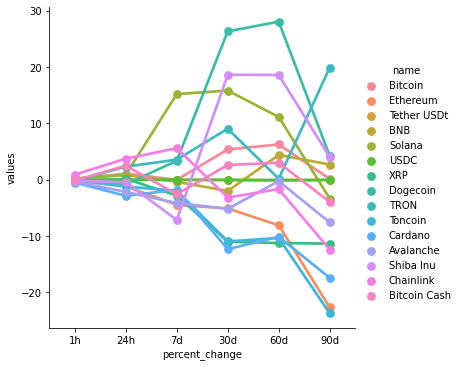

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percent_change', y='values', hue='name', data=df3, kind='point')

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestammp
0,1,Bitcoin,BTC,bitcoin,11788,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977257e+07,1.977257e+07,False,NaN,1,NaN,NaN,None,2024-10-25T02:37:00.000Z,67942.380894,2.989611e+10,-12.8526,0.073561,1.030084,-0.044967,5.420223,6.272911,0.149025,1.343396e+12,57.8617,1.426790e+12,None,2024-10-25T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 02:39:54.950077
1,1027,Ethereum,ETH,ethereum,9446,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203974e+08,1.203974e+08,True,NaN,2,NaN,NaN,None,2024-10-25T02:37:00.000Z,2515.876700,1.539559e+10,-18.3166,-0.226536,-1.216087,-4.465690,-5.013196,-8.089490,-22.649801,3.029050e+11,13.0465,3.029050e+11,None,2024-10-25T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 02:39:54.950077
2,825,Tether USDt,USDT,tether,101488,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.202217e+11,1.213379e+11,True,NaN,3,NaN,NaN,None,2024-10-25T02:37:00.000Z,0.999269,5.524110e+10,-13.5396,-0.014405,0.015536,-0.027751,-0.075257,-0.193342,-0.074975,1.201338e+11,5.1721,1.212493e+11,None,2024-10-25T02:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-25 02:39:54.950077
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459313e+08,1.459313e+08,False,NaN,4,NaN,NaN,None,2024-10-25T02:37:00.000Z,594.367817,1.577247e+09,-10.0043,0.041776,0.831161,-0.371756,-1.963886,4.363697,2.686875,8.673684e+10,3.7342,8.673684e+10,None,2024-10-25T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 02:39:54.950077
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.700908e+08,5.871104e+08,True,NaN,5,NaN,NaN,None,2024-10-25T02:37:00.000Z,176.045281,3.361965e+09,-18.1334,0.157629,0.878970,15.221390,15.858343,11.105469,-3.339443,8.275726e+10,3.5645,1.033580e+11,None,2024-10-25T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 02:39:54.950077
5,3408,USDC,USDC,usd-coin,22648,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.450245e+10,3.450245e+10,False,NaN,6,NaN,NaN,None,2024-10-25T02:37:00.000Z,0.999725,6.616208e+09,-11.1025,-0.018650,-0.046514,-0.013986,-0.028997,-0.065209,-0.028038,3.449295e+10,1.4851,3.449295e+10,None,2024-10-25T02:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-25 02:39:54.950077
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.675636e+10,9.998709e+10,False,NaN,7,NaN,NaN,None,2024-10-25T02:37:00.000Z,0.528701,8.499968e+08,-16.0625,-0.384850,0.157906,-2.783605,-10.982523,-11.232035,-11.310874,3.000716e+10,1.2924,5.287012e+10,None,2024-10-25T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 02:39:54.950077
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.465082e+11,1.465082e+11,True,NaN,8,NaN,NaN,None,2024-10-25T02:37:00.000Z,0.139657,1.263959e+09,-17.5444,-0.035804,-0.823297,3.314419,26.344387,27.972305,4.190090,2.046091e+10,0.8810,2.046091e+10,None,2024-10-25T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 02:39:54.950077
8,1958,TRON,TRX,tron,1058,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.649

In [17]:
#Lets filter the dataframe to show only the price and timestamp for Bitcoin
df4 = df[['name', 'quote.USD.price', 'timestammp']]
df4 = df4.query("name=='Bitcoin'")
df4['timestammp'] = pd.to_datetime(df4['timestammp'].astype(str).str[:-7])
df4

,name,quote.USD.price,timestammp
0,Bitcoin,67942.380894,2024-10-25 02:39:54
0,Bitcoin,67942.380894,2024-10-25 02:39:55
0,Bitcoin,67951.096998,2024-10-25 02:40:55
0,Bitcoin,67942.511928,2024-10-25 02:41:55


<AxesSubplot:xlabel='timestammp', ylabel='quote.USD.price'>

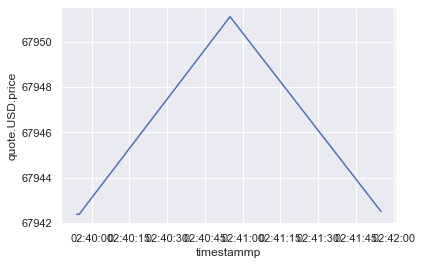

In [18]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestammp', y='quote.USD.price', data=df4)